# Experimentos sobre modelo Barabási

In [7]:
import networkx as nx
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import random
import numpy

from noisy_graph import NoisyGraph
from networkx.algorithms import centrality

Construcción de grafo ruidoso a partir de grafo de Barábasi-Albert

In [2]:
# experimental setup
seed = 200494
random.seed(seed)
numpy.random.seed(seed)

# original graph
n = 1000
m = 20
ftrp = 0.50
graph = nx.barabasi_albert_graph(n=n, m=m, seed=seed)

# noisy graph
noisy_graph = NoisyGraph(ftrp=ftrp)

# construction
for node in graph.nodes:
    neighbors = list(graph.neighbors(node))
    noisy_graph.add_node_with_neighbors(node, neighbors)

Histograma de $\sigma_i$

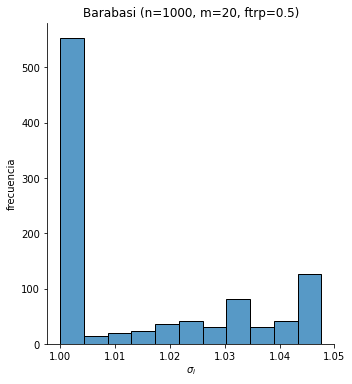

In [3]:
n_sigmas = noisy_graph.get_graph_sigmas()
sns.displot(n_sigmas)
plt.title(f"Barabasi (n={n}, m={m}, ftrp={ftrp})")
plt.xlabel(r'$\sigma_i$')
plt.ylabel('frecuencia');

Obtención de incertidumbre

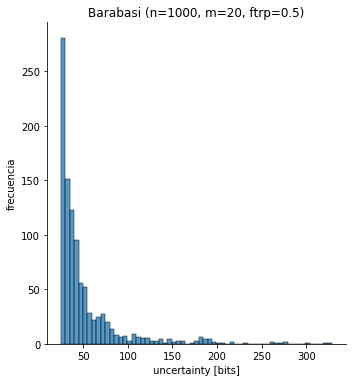

In [4]:
node_uncertainties = noisy_graph.node_uncertainties()
sns.displot(node_uncertainties)
plt.title(f"Barabasi (n={n}, m={m}, ftrp={ftrp})")
plt.xlabel('uncertainty [bits]')
plt.ylabel('frecuencia');

Obtención de métricas de centralidad

In [5]:
# métricas de grafo original
normal_degree_centrality = centrality.degree_centrality(graph)

# métricas de grafo perturbado
noisy_graph = nx.Graph(noisy_graph.edges())
noisy_degree_centrality = centrality.degree_centrality(noisy_graph)

In [18]:
# creando dataframe
normal_df = pd.DataFrame(normal_degree_centrality.values(), columns=['degree'])
normal_df['graph'] = "original"

noisy_df = pd.DataFrame(noisy_degree_centrality.values(), columns=['degree'])
noisy_df['graph'] = "noisy"

degree_df = normal_df.append(noisy_df)
degree_df.shape

(2000, 2)

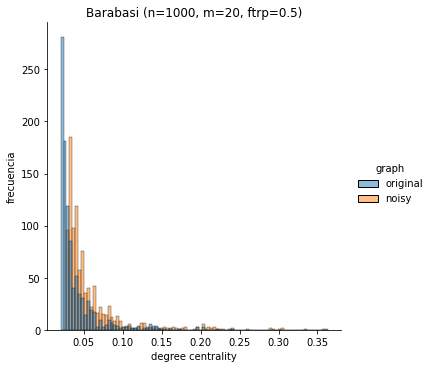

In [21]:
# generando histogramas de centralidad
sns.displot(data=degree_df, x="degree", hue="graph")
plt.title(f"Barabasi (n={n}, m={m}, ftrp={ftrp})")
plt.xlabel('degree centrality')
plt.ylabel('frecuencia');